In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the style for seaborn
sns.set(style="whitegrid")
df=pd.read_csv(r'C:\Users\omara\OneDrive\Desktop\Assignments Course\Repos\Course\Social Media\Social-MediaVsProductivity\src\data\social_media_vs_productivity.csv')

In [3]:
df.head()

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,NaN,Telegram,66,6.214096,8.868753,NaN,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060


In [4]:
df.describe().T['count']

age                               30000.0
daily_social_media_time           27235.0
number_of_notifications           30000.0
work_hours_per_day                30000.0
perceived_productivity_score      28386.0
actual_productivity_score         27635.0
stress_level                      28096.0
sleep_hours                       27402.0
screen_time_before_sleep          27789.0
breaks_during_work                30000.0
coffee_consumption_per_day        30000.0
days_feeling_burnout_per_month    30000.0
weekly_offline_hours              30000.0
job_satisfaction_score            27270.0
Name: count, dtype: float64

In [5]:
df.columns

Index(['age', 'gender', 'job_type', 'daily_social_media_time',
       'social_platform_preference', 'number_of_notifications',
       'work_hours_per_day', 'perceived_productivity_score',
       'actual_productivity_score', 'stress_level', 'sleep_hours',
       'screen_time_before_sleep', 'breaks_during_work', 'uses_focus_apps',
       'has_digital_wellbeing_enabled', 'coffee_consumption_per_day',
       'days_feeling_burnout_per_month', 'weekly_offline_hours',
       'job_satisfaction_score'],
      dtype='object')

In [6]:
#dropping the NaNs in the target to avoid introducing bias to the models 
df = df.dropna(subset=['actual_productivity_score'])


In [7]:
# Split the data into X (features) and y (target)
X = df.drop('actual_productivity_score', axis=1)
y = df['actual_productivity_score']
X.head(), y.head()

(   age  gender    job_type  daily_social_media_time  \
 0   56    Male  Unemployed                 4.180940   
 1   46    Male      Health                 3.249603   
 2   32    Male     Finance                      NaN   
 3   60  Female  Unemployed                      NaN   
 5   38    Male     Finance                 1.512568   
 
   social_platform_preference  number_of_notifications  work_hours_per_day  \
 0                   Facebook                       61            6.753558   
 1                    Twitter                       59            9.169296   
 2                    Twitter                       57            7.910952   
 3                   Facebook                       59            6.355027   
 5                    Twitter                       50            6.429312   
 
    perceived_productivity_score  stress_level  sleep_hours  \
 0                      8.040464           4.0     5.116546   
 1                      5.063368           7.0     5.103897   
 2 

In [8]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets while preserving the index
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# Reset index to preserve original indices in train/test sets
X_train = X_train.sort_index()
X_test = X_test.sort_index()
y_train = y_train.sort_index()
y_test = y_test.sort_index()

X_train.head(), X_test.head(), y_train.head(), y_test.head()

(   age  gender    job_type  daily_social_media_time  \
 0   56    Male  Unemployed                 4.180940   
 1   46    Male      Health                 3.249603   
 2   32    Male     Finance                      NaN   
 5   38    Male     Finance                 1.512568   
 6   56  Female  Unemployed                 4.381070   
 
   social_platform_preference  number_of_notifications  work_hours_per_day  \
 0                   Facebook                       61            6.753558   
 1                    Twitter                       59            9.169296   
 2                    Twitter                       57            7.910952   
 5                    Twitter                       50            6.429312   
 6                     TikTok                       60            3.902309   
 
    perceived_productivity_score  stress_level  sleep_hours  \
 0                      8.040464           4.0     5.116546   
 1                      5.063368           7.0     5.103897   
 2 

In [9]:
# Identify column types based on the dataset
numerical_cols = [
    'age', 'daily_social_media_time', 'number_of_notifications', 'work_hours_per_day',
    'perceived_productivity_score', 'stress_level', 'sleep_hours', 'screen_time_before_sleep',
    'breaks_during_work', 'coffee_consumption_per_day', 'days_feeling_burnout_per_month',
    'weekly_offline_hours', 'job_satisfaction_score'
]
ordinal_cols = ['uses_focus_apps', 'has_digital_wellbeing_enabled']
nominal_cols = ['gender', 'job_type', 'social_platform_preference']

# Split X_train and X_test
X_train_num = X_train[numerical_cols]
X_test_num = X_test[numerical_cols]
X_train_ord = X_train[ordinal_cols]
X_test_ord = X_test[ordinal_cols]
X_train_nom = X_train[nominal_cols]
X_test_nom = X_test[nominal_cols]

X_train_num.head(), X_train_ord.head(), X_train_nom.head()

(   age  daily_social_media_time  number_of_notifications  work_hours_per_day  \
 0   56                 4.180940                       61            6.753558   
 1   46                 3.249603                       59            9.169296   
 2   32                      NaN                       57            7.910952   
 5   38                 1.512568                       50            6.429312   
 6   56                 4.381070                       60            3.902309   
 
    perceived_productivity_score  stress_level  sleep_hours  \
 0                      8.040464           4.0     5.116546   
 1                      5.063368           7.0     5.103897   
 2                      3.861762           4.0     8.583222   
 5                           NaN           5.0     5.515251   
 6                      6.420989           7.0     7.549849   
 
    screen_time_before_sleep  breaks_during_work  coffee_consumption_per_day  \
 0                  0.419102                   8    

<Axes: >

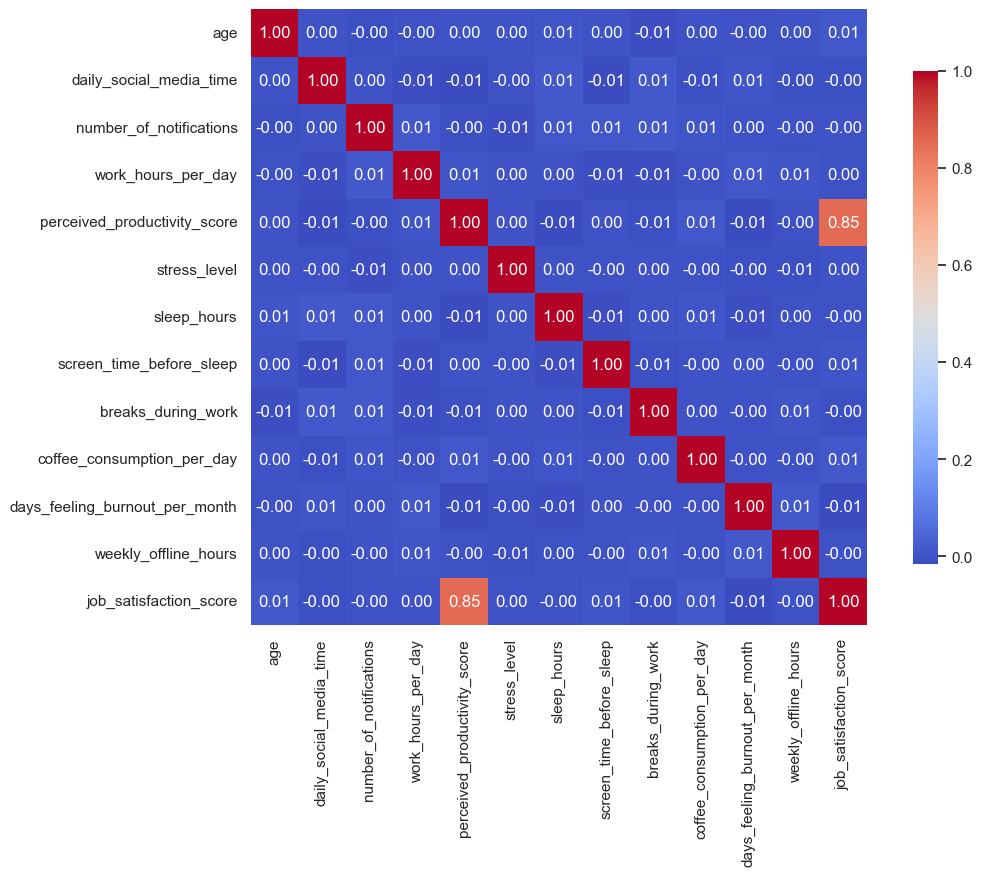

In [10]:
corr=X_train_num.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

In [11]:
X_train_num.head()

,age,daily_social_media_time,number_of_notifications,work_hours_per_day,perceived_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,4.180940,61,6.753558,8.040464,4.0,5.116546,0.419102,8,4,11,21.927072,6.336688
1,46,3.249603,59,9.169296,5.063368,7.0,5.103897,0.671519,7,2,25,0.000000,3.412427
2,32,NaN,57,7.910952,3.861762,4.0,8.583222,0.624378,0,3,17,10.322044,2.474944
5,38,1.512568,50,6.429312,NaN,5.0,5.515251,1.518612,5,5,2,0.000000,4.568728
6,56,4.381070,60,3.902309,6.420989,7.0,7.549849,2.252624,4,4,20,24.084905,5.501373


In [12]:
X_train_ord

,uses_focus_apps,has_digital_wellbeing_enabled
0,False,False
1,True,True
2,True,False
5,False,True
6,False,False
...,...,...
29993,True,True
29994,True,True
29996,False,False
29998,False,False


In [13]:
X_train_num.describe().T

,count,mean,std,min,25%,50%,75%,max
age,22108.0,41.453365,13.870575,18.000000,30.000000,41.000000,53.000000,65.000000
daily_social_media_time,20087.0,3.106937,2.067640,0.000000,1.631360,3.027009,4.368190,17.973256
number_of_notifications,22108.0,59.969287,7.730026,30.000000,55.000000,60.000000,65.000000,90.000000
work_hours_per_day,22108.0,6.991662,2.000570,0.000000,5.646704,6.986895,8.365579,12.000000
perceived_productivity_score,20918.0,5.512904,2.022920,2.000252,3.763259,5.534486,7.258484,8.999376
stress_level,20695.0,5.531143,2.866624,1.000000,3.000000,6.000000,8.000000,10.000000
sleep_hours,20208.0,6.504555,1.463165,3.000000,5.496810,6.504013,7.507414,10.000000
screen_time_before_sleep,20459.0,1.025332,0.653051,0.000000,0.527136,1.008459,1.479742,3.000000
breaks_during_work,22108.0,4.971730,3.176588,0.000000,2.000000,5.000000,8.000000,10.000000
coffee_consumption_per_day,22108.0,2.000859,1.410899,0.000000,1.000000,2.000000,3.000000,10.000000


In [14]:
# Impute missing values in selected numerical columns using KNNImputer
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

# Copy all columns, impute only the selected ones
X_train_num_scaled = X_train.copy()
X_test_num_scaled = X_test.copy()

X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [15]:
# Impute missing values in selected numerical columns using KNNImputer
from sklearn.impute import KNNImputer

num_impute_cols = [
    'daily_social_media_time',
    'perceived_productivity_score',
    'stress_level',
    'sleep_hours',
    'screen_time_before_sleep',
    'job_satisfaction_score'
]

knn_imputer = KNNImputer(n_neighbors=5)

# Impute on the scaled numerical columns only
X_train_num_imputed = pd.DataFrame(
    knn_imputer.fit_transform(X_train_num_scaled),
    columns=X_train_num.columns,
    index=X_train_num.index
)
X_test_num_imputed = pd.DataFrame(
    knn_imputer.transform(X_test_num_scaled),
    columns=X_test_num.columns,
    index=X_test_num.index
)

X_train_num_imputed.head(), X_test_num_imputed.head()

(        age  daily_social_media_time  number_of_notifications  \
 0  0.652174                 0.421630                      0.1   
 1  0.217391                 0.081333                     -0.1   
 2 -0.391304                 0.076210                     -0.3   
 5 -0.130435                -0.553356                     -1.0   
 6  0.652174                 0.494755                      0.0   
 
    work_hours_per_day  perceived_productivity_score  stress_level  \
 0           -0.085821                      0.716972          -0.4   
 1            0.802686                     -0.134789           0.2   
 2            0.339868                     -0.478574          -0.4   
 5           -0.205079                     -0.113477          -0.2   
 6           -1.134509                      0.253633           0.2   
 
    sleep_hours  screen_time_before_sleep  breaks_during_work  \
 0    -0.690075                 -0.618678            0.500000   
 1    -0.696366                 -0.353703         

In [16]:
X_train_num_imputed.head()

,age,daily_social_media_time,number_of_notifications,work_hours_per_day,perceived_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,0.652174,0.421630,0.1,-0.085821,0.716972,-0.4,-0.690075,-0.618678,0.500000,1.0,-0.2500,1.106710,0.431447
1,0.217391,0.081333,-0.1,0.802686,-0.134789,0.2,-0.696366,-0.353703,0.333333,0.0,0.6250,-0.936667,-0.478835
2,-0.391304,0.076210,-0.3,0.339868,-0.478574,-0.4,1.034121,-0.403190,-0.833333,0.5,0.1250,0.025241,-0.770661
5,-0.130435,-0.553356,-1.0,-0.205079,-0.113477,-0.2,-0.491774,0.535534,0.000000,1.5,-0.8125,-0.936667,-0.118895
6,0.652174,0.494755,0.0,-1.134509,0.253633,0.2,0.520160,1.306064,-0.166667,1.0,0.3125,1.307798,0.171425


<Axes: >

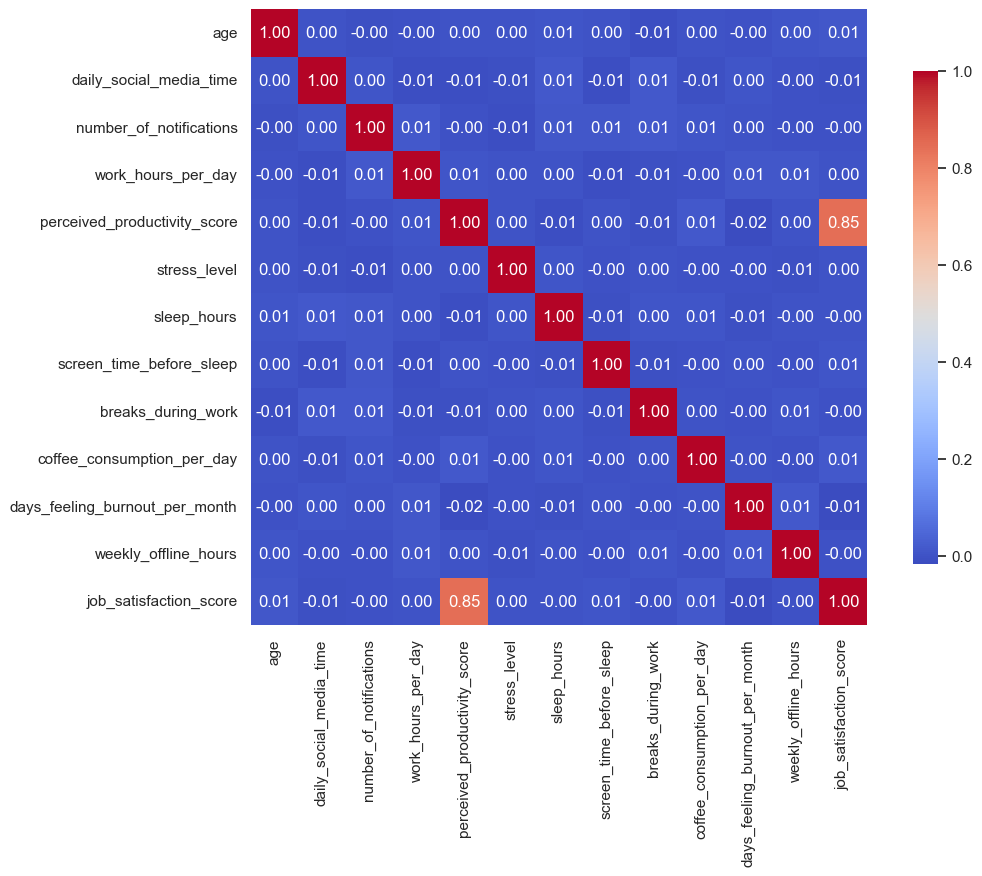

In [17]:
corr=X_train_num_imputed.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

In [18]:
X_train_nom

,gender,job_type,social_platform_preference
0,Male,Unemployed,Facebook
1,Male,Health,Twitter
2,Male,Finance,Twitter
5,Male,Finance,Twitter
6,Female,Unemployed,TikTok
...,...,...,...
29993,Female,Education,Instagram
29994,Male,Student,Twitter
29996,Male,Health,Instagram
29998,Female,Education,Instagram


In [19]:
print(X_test_num_imputed.dtypes)

age                               float64
daily_social_media_time           float64
number_of_notifications           float64
work_hours_per_day                float64
perceived_productivity_score      float64
stress_level                      float64
sleep_hours                       float64
screen_time_before_sleep          float64
breaks_during_work                float64
coffee_consumption_per_day        float64
days_feeling_burnout_per_month    float64
weekly_offline_hours              float64
job_satisfaction_score            float64
dtype: object


In [20]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode nominal columns for train and test sets
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_train_nom_encoded = pd.DataFrame(
    encoder.fit_transform(X_train_nom),
    index=X_train_nom.index,
    columns=encoder.get_feature_names_out(X_train_nom.columns)
)
X_test_nom_encoded = pd.DataFrame(
    encoder.transform(X_test_nom),
    index=X_test_nom.index,
    columns=encoder.get_feature_names_out(X_test_nom.columns)
)

X_train_nom_encoded.head(), X_test_nom_encoded.head()

(   gender_Male  gender_Other  job_type_Finance  job_type_Health  job_type_IT  \
 0          1.0           0.0               0.0              0.0          0.0   
 1          1.0           0.0               0.0              1.0          0.0   
 2          1.0           0.0               1.0              0.0          0.0   
 5          1.0           0.0               1.0              0.0          0.0   
 6          0.0           0.0               0.0              0.0          0.0   
 
    job_type_Student  job_type_Unemployed  \
 0               0.0                  1.0   
 1               0.0                  0.0   
 2               0.0                  0.0   
 5               0.0                  0.0   
 6               0.0                  1.0   
 
    social_platform_preference_Instagram  social_platform_preference_Telegram  \
 0                                   0.0                                  0.0   
 1                                   0.0                                  0.0 

In [21]:
X_train_nom_encoded

,gender_Male,gender_Other,job_type_Finance,job_type_Health,job_type_IT,job_type_Student,job_type_Unemployed,social_platform_preference_Instagram,social_platform_preference_Telegram,social_platform_preference_TikTok,social_platform_preference_Twitter
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
29993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
29994,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
29996,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
29998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [22]:
# Check for NaNs in all processed X_train and X_test feature sets after imputation and encoding
print('NaNs in X_train_num_imputed:', X_train_num_imputed.isnull().sum().sum())
print('NaNs in X_test_num_imputed:', X_test_num_imputed.isnull().sum().sum())
print('NaNs in X_train_nom_encoded:', X_train_nom_encoded.isnull().sum().sum())
print('NaNs in X_test_nom_encoded:', X_test_nom_encoded.isnull().sum().sum())
print('NaNs in X_train_ord_encoded:', X_train_ord.isnull().sum().sum())
print('NaNs in X_test_ord_encoded:', X_test_ord.isnull().sum().sum())

NaNs in X_train_num_imputed: 0
NaNs in X_test_num_imputed: 0
NaNs in X_train_nom_encoded: 0
NaNs in X_test_nom_encoded: 0
NaNs in X_train_ord_encoded: 0
NaNs in X_test_ord_encoded: 0


In [23]:
# Concatenate processed numerical, ordinal, and nominal features
X_train_final = pd.concat([
    X_train_num_imputed,
    X_train_ord.astype(int),
    X_train_nom_encoded
], axis=1)

X_test_final = pd.concat([
    X_test_num_imputed,
    X_test_ord.astype(int),
    X_test_nom_encoded
], axis=1)

# Check if indices still match original train/test splits
print('X_train_final index equals y_train:', X_train_final.index.equals(y_train.index))
print('X_test_final index equals y_test:', X_test_final.index.equals(y_test.index))

X_train_final.head(), X_test_final.head()

X_train_final index equals y_train: True
X_test_final index equals y_test: True


(        age  daily_social_media_time  number_of_notifications  \
 0  0.652174                 0.421630                      0.1   
 1  0.217391                 0.081333                     -0.1   
 2 -0.391304                 0.076210                     -0.3   
 5 -0.130435                -0.553356                     -1.0   
 6  0.652174                 0.494755                      0.0   
 
    work_hours_per_day  perceived_productivity_score  stress_level  \
 0           -0.085821                      0.716972          -0.4   
 1            0.802686                     -0.134789           0.2   
 2            0.339868                     -0.478574          -0.4   
 5           -0.205079                     -0.113477          -0.2   
 6           -1.134509                      0.253633           0.2   
 
    sleep_hours  screen_time_before_sleep  breaks_during_work  \
 0    -0.690075                 -0.618678            0.500000   
 1    -0.696366                 -0.353703         

In [24]:
X_train_final.head()

,age,daily_social_media_time,number_of_notifications,work_hours_per_day,perceived_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,coffee_consumption_per_day,...,gender_Other,job_type_Finance,job_type_Health,job_type_IT,job_type_Student,job_type_Unemployed,social_platform_preference_Instagram,social_platform_preference_Telegram,social_platform_preference_TikTok,social_platform_preference_Twitter
0,0.652174,0.421630,0.1,-0.085821,0.716972,-0.4,-0.690075,-0.618678,0.500000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.217391,0.081333,-0.1,0.802686,-0.134789,0.2,-0.696366,-0.353703,0.333333,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.391304,0.076210,-0.3,0.339868,-0.478574,-0.4,1.034121,-0.403190,-0.833333,0.5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,-0.130435,-0.553356,-1.0,-0.205079,-0.113477,-0.2,-0.491774,0.535534,0.000000,1.5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.652174,0.494755,0.0,-1.134509,0.253633,0.2,0.520160,1.306064,-0.166667,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


Summary statistics with skewness:


,count,mean,std,min,25%,50%,75%,max,skew
age,22108.0,0.019712,0.603068,-1.000000,-0.478261,0.000000e+00,0.521739,1.043478,0.021863
daily_social_media_time,22108.0,0.028603,0.727807,-1.106028,-0.466307,1.023741e-03,0.456493,5.461153,1.183512
number_of_notifications,22108.0,-0.003071,0.773003,-3.000000,-0.500000,0.000000e+00,0.500000,3.000000,0.111712
work_hours_per_day,22108.0,0.001753,0.735808,-2.569775,-0.492921,-1.633351e-16,0.507079,1.843816,-0.039224
perceived_productivity_score,22108.0,-0.006197,0.569277,-1.011161,-0.490215,-1.042875e-03,0.476219,0.991321,-0.014781
stress_level,22108.0,-0.093783,0.558569,-1.000000,-0.600000,-8.000000e-02,0.400000,0.800000,-0.001847
sleep_hours,22108.0,0.000547,0.702283,-1.742766,-0.463267,6.266894e-04,0.465608,1.738774,0.006917
screen_time_before_sleep,22108.0,0.017904,0.664992,-1.058631,-0.470337,1.646895e-03,0.463274,2.090623,0.302451
breaks_during_work,22108.0,-0.004712,0.529431,-0.833333,-0.500000,0.000000e+00,0.500000,0.833333,0.013660
coffee_consumption_per_day,22108.0,0.000430,0.705449,-1.000000,-0.500000,0.000000e+00,0.500000,4.000000,0.681169


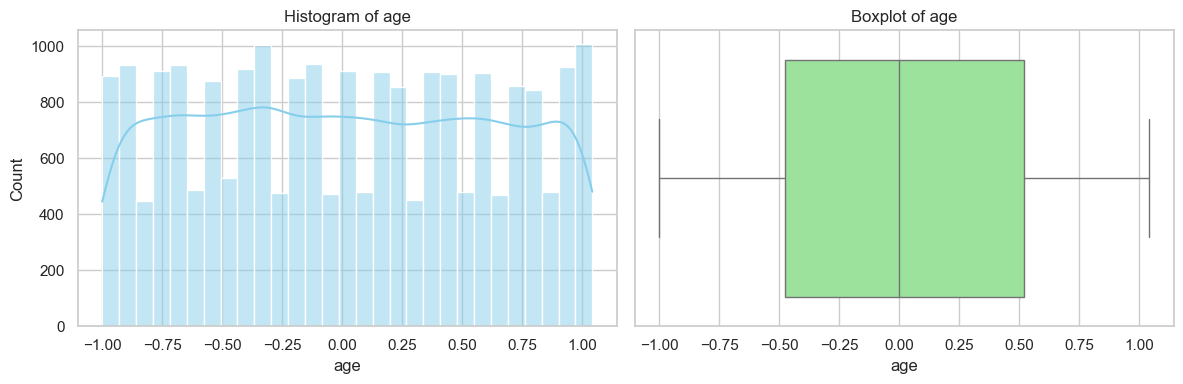

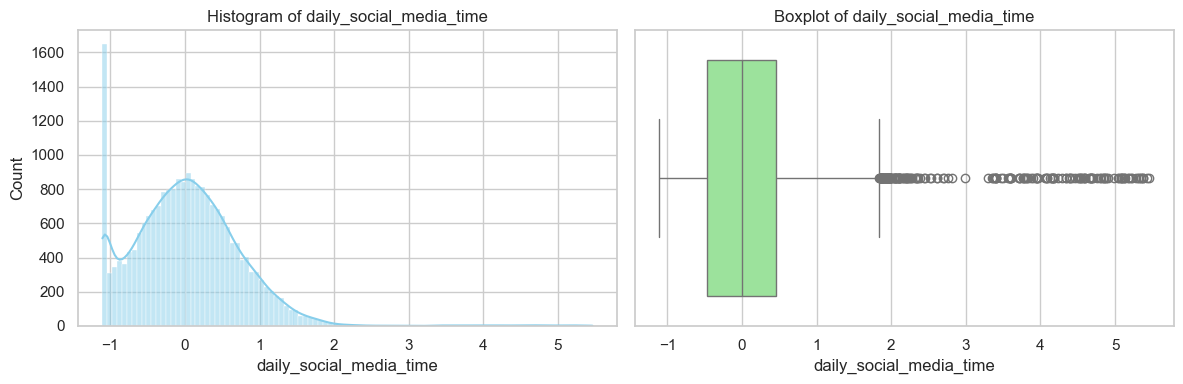

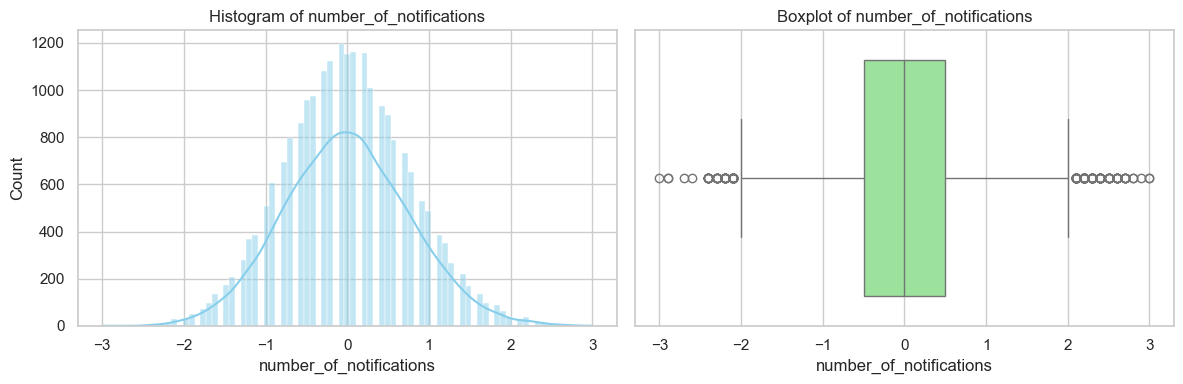

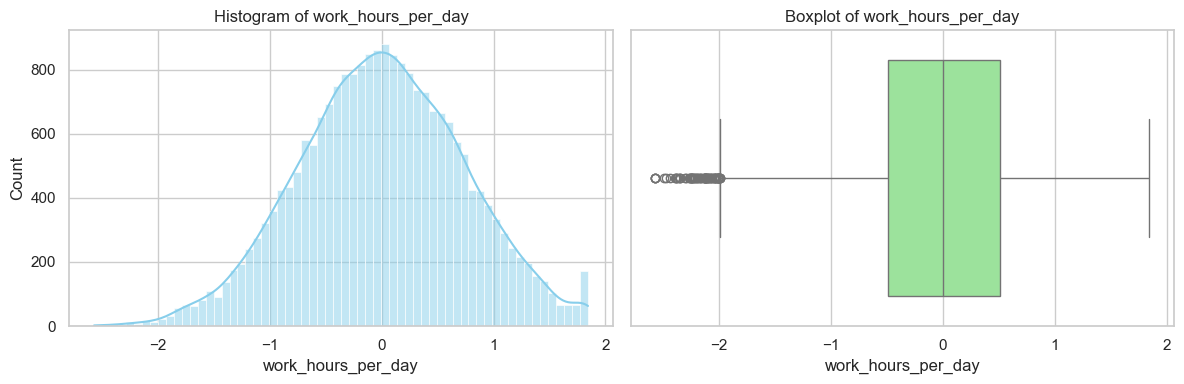

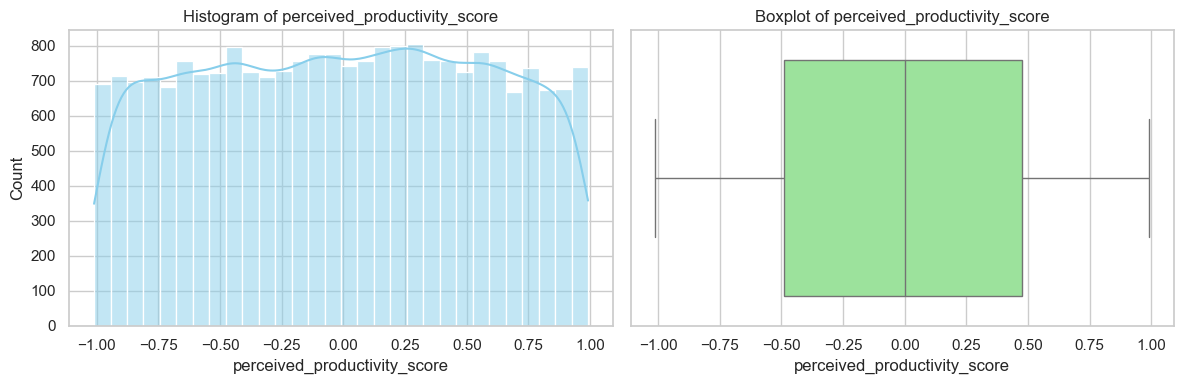

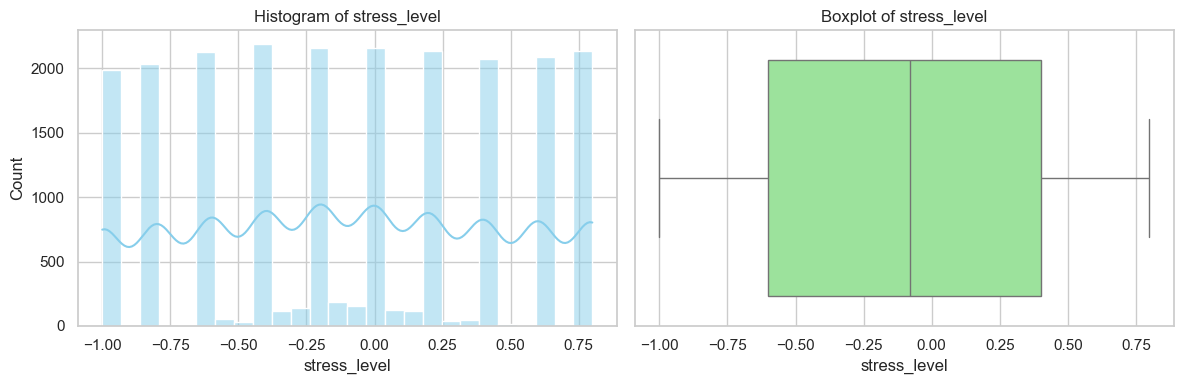

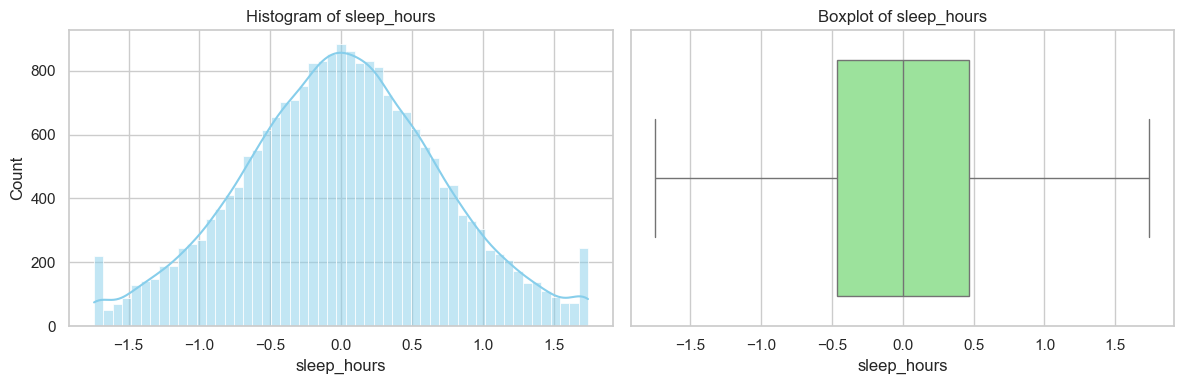

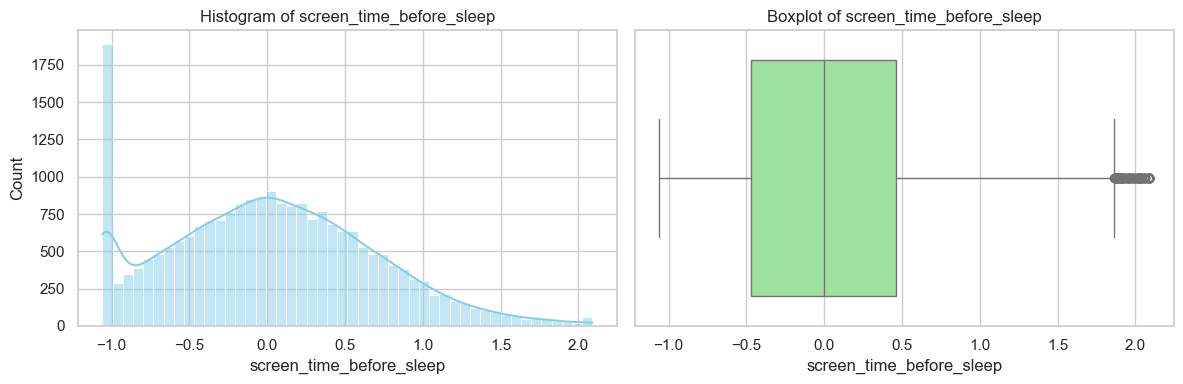

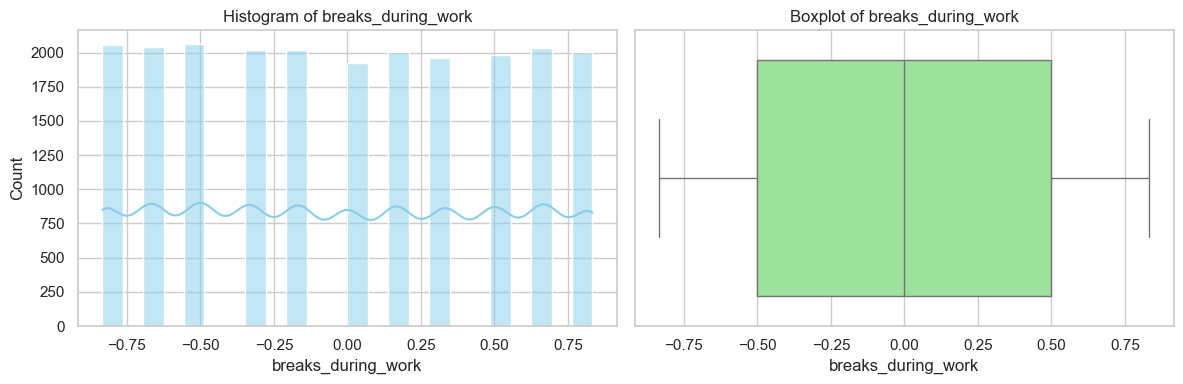

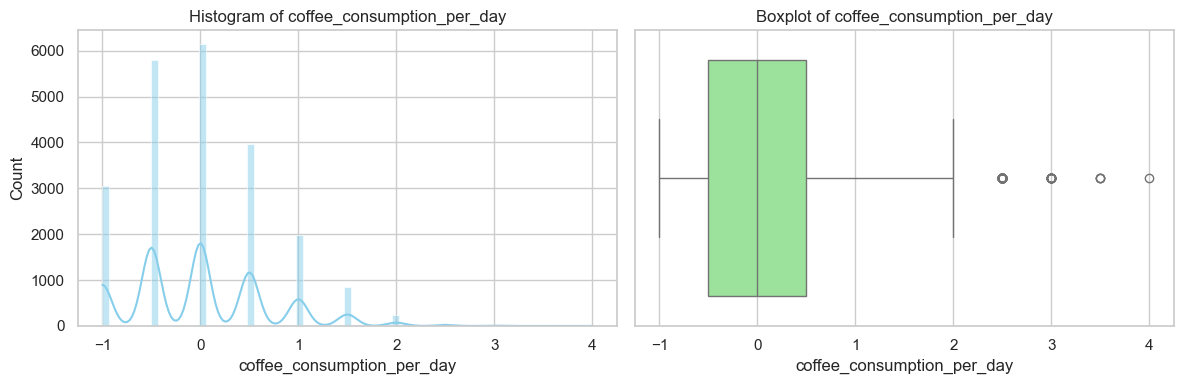

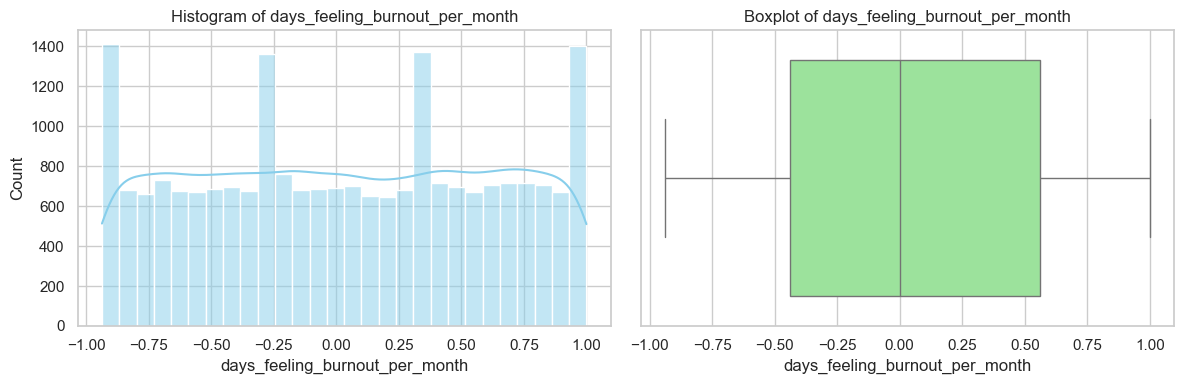

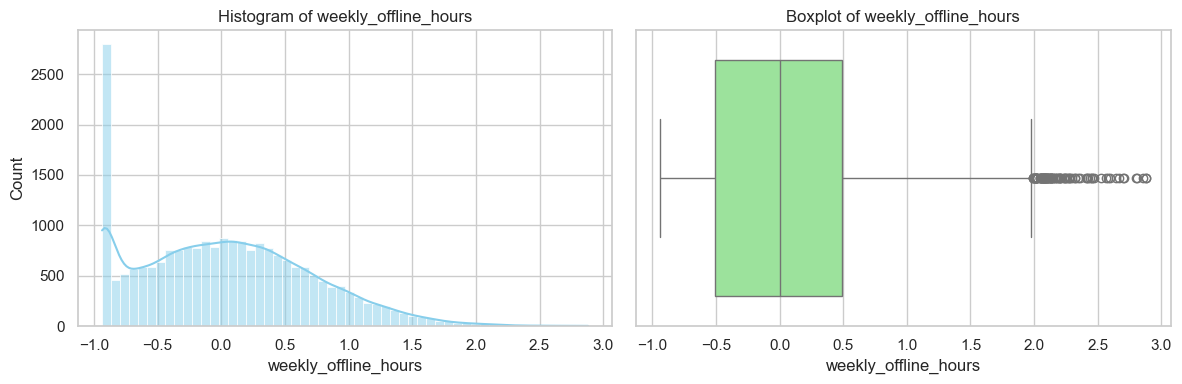

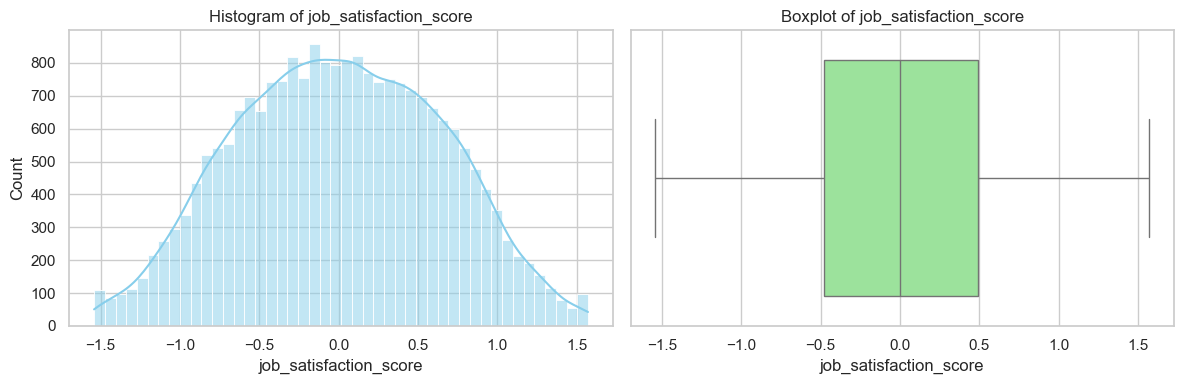

In [25]:
num_cols = numerical_cols

# Summary statistics
summary_stats = X_train_final[num_cols].describe().T
summary_stats['skew'] = X_train_final[num_cols].skew()
print('Summary statistics with skewness:')
display(summary_stats)

# Distribution plots and box plots for each numeric column
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(X_train_final[col], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Histogram of {col}')
    sns.boxplot(x=X_train_final[col], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

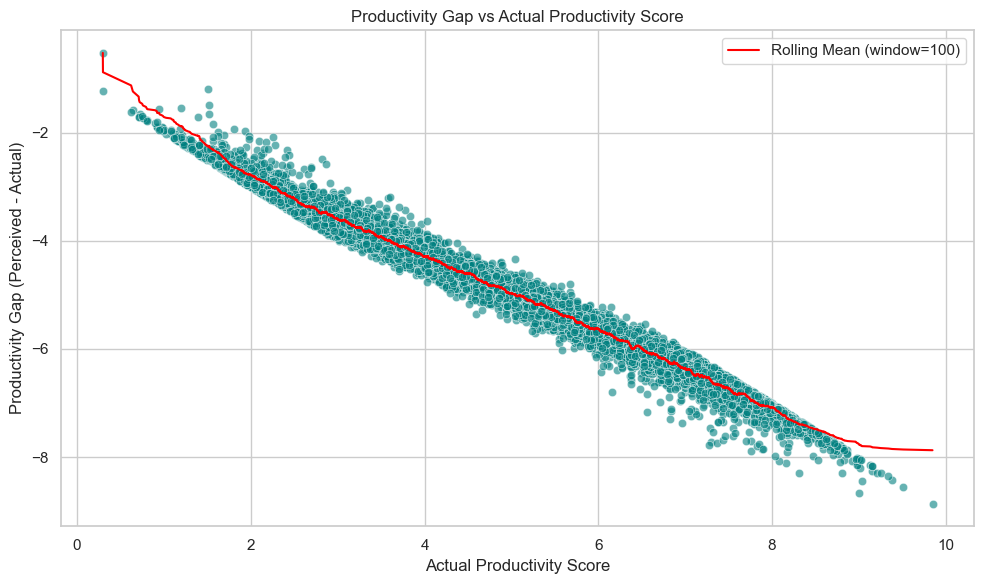

In [26]:
#Imposter Syndrome or Dunning-Kruger Effect
X_train_final["productivity_gap"] = X_train_final["perceived_productivity_score"] - y_train.values

# Use a 10% random sample for better visualization
sample = X_train_final.sample(frac=0.5, random_state=42)
actual_scores_sample = y_train.loc[sample.index]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=actual_scores_sample, y=sample["productivity_gap"], alpha=0.6, color="teal")
# Rolling mean for trend line (using the sample)
sample_sorted = sample.copy()
sample_sorted["actual_productivity_score"] = actual_scores_sample
sample_sorted = sample_sorted.sort_values("actual_productivity_score")
rolling_mean = sample_sorted["productivity_gap"].rolling(window=100, min_periods=1).mean()
sns.lineplot(
    x=sample_sorted["actual_productivity_score"],
    y=rolling_mean,
    color="red",
    label="Rolling Mean (window=100)"
)
plt.title("Productivity Gap vs Actual Productivity Score")
plt.xlabel("Actual Productivity Score")
plt.ylabel("Productivity Gap (Perceived - Actual)")
plt.legend()
plt.tight_layout()
plt.show()

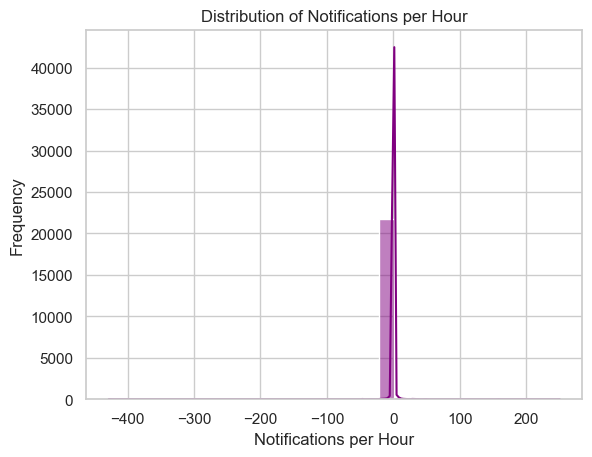

In [28]:
wh_perday=1/16
X_train_final["notifications_per_hour"] = wh_perday*(X_train_final["number_of_notifications"] / X_train_final["work_hours_per_day"])
sns.histplot(X_train_final["notifications_per_hour"], kde=True, bins=30, color='purple')
plt.title("Distribution of Notifications per Hour")
plt.xlabel("Notifications per Hour")
plt.ylabel("Frequency")
plt.show()

C:\Users\omara\AppData\Local\Temp\ipykernel_19508\167932898.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="notif_bin", data=X_train_final, palette="viridis")


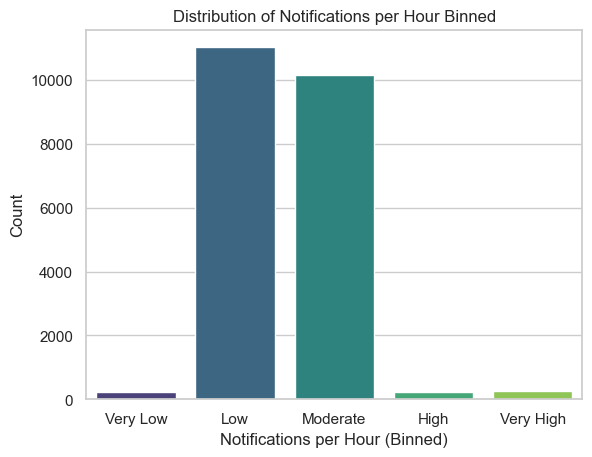

In [29]:
X_train_final["notif_bin"] = pd.cut(
    X_train_final["notifications_per_hour"],
    bins=[-2, -1, 0, 1, 2, X_train_final["notifications_per_hour"].max()],
    labels=["Very Low", "Low", "Moderate", "High", "Very High"]
)
sns.countplot(x="notif_bin", data=X_train_final, palette="viridis")
plt.title("Distribution of Notifications per Hour Binned")
plt.xlabel("Notifications per Hour (Binned)")
plt.ylabel("Count")
plt.show()

In [30]:
X_train_final.describe().T

,count,mean,std,min,25%,50%,75%,max
age,22108.0,0.019712,0.603068,-1.000000,-0.478261,0.000000e+00,0.521739,1.043478
daily_social_media_time,22108.0,0.028603,0.727807,-1.106028,-0.466307,1.023741e-03,0.456493,5.461153
number_of_notifications,22108.0,-0.003071,0.773003,-3.000000,-0.500000,0.000000e+00,0.500000,3.000000
work_hours_per_day,22108.0,0.001753,0.735808,-2.569775,-0.492921,-1.633351e-16,0.507079,1.843816
perceived_productivity_score,22108.0,-0.006197,0.569277,-1.011161,-0.490215,-1.042875e-03,0.476219,0.991321
stress_level,22108.0,-0.093783,0.558569,-1.000000,-0.600000,-8.000000e-02,0.400000,0.800000
sleep_hours,22108.0,0.000547,0.702283,-1.742766,-0.463267,6.266894e-04,0.465608,1.738774
screen_time_before_sleep,22108.0,0.017904,0.664992,-1.058631,-0.470337,1.646895e-03,0.463274,2.090623
breaks_during_work,22108.0,-0.004712,0.529431,-0.833333,-0.500000,0.000000e+00,0.500000,0.833333
coffee_consumption_per_day,22108.0,0.000430,0.705449,-1.000000,-0.500000,0.000000e+00,0.500000,4.000000


In [31]:
print(X_train_final["notifications_per_hour"].min(), X_train_final["notifications_per_hour"].max())

-428.20170586995744 250.55626373291952


In [32]:
X_train_final.columns#uses focus apps or digital wellbeing enabled versus daily social media time

Index(['age', 'daily_social_media_time', 'number_of_notifications',
       'work_hours_per_day', 'perceived_productivity_score', 'stress_level',
       'sleep_hours', 'screen_time_before_sleep', 'breaks_during_work',
       'coffee_consumption_per_day', 'days_feeling_burnout_per_month',
       'weekly_offline_hours', 'job_satisfaction_score', 'uses_focus_apps',
       'has_digital_wellbeing_enabled', 'gender_Male', 'gender_Other',
       'job_type_Finance', 'job_type_Health', 'job_type_IT',
       'job_type_Student', 'job_type_Unemployed',
       'social_platform_preference_Instagram',
       'social_platform_preference_Telegram',
       'social_platform_preference_TikTok',
       'social_platform_preference_Twitter', 'productivity_gap',
       'notifications_per_hour', 'notif_bin'],
      dtype='object')

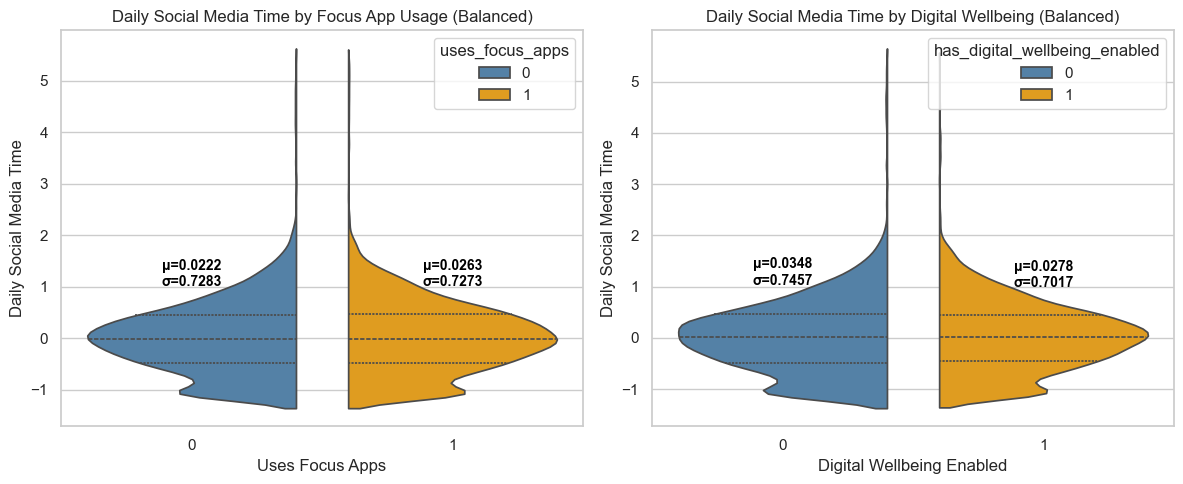

In [34]:
# Balance classes for violin plots by downsampling the majority class for each variable
from sklearn.utils import resample

# Helper function to balance classes for a binary column
def balance_classes(df, col, y_col):
    class_0 = df[df[col] == 0]
    class_1 = df[df[col] == 1]
    n_samples = min(len(class_0), len(class_1))
    class_0_bal = resample(class_0, replace=False, n_samples=n_samples, random_state=42)
    class_1_bal = resample(class_1, replace=False, n_samples=n_samples, random_state=42)
    return pd.concat([class_0_bal, class_1_bal])

# Balance for 'uses_focus_apps'
balanced_focus = balance_classes(X_train_final, 'uses_focus_apps', 'daily_social_media_time')
# Balance for 'has_digital_wellbeing_enabled'
balanced_wellbeing = balance_classes(X_train_final, 'has_digital_wellbeing_enabled', 'daily_social_media_time')

plt.figure(figsize=(12, 5))
# Plot 1: Focus Apps (balanced)
plt.subplot(1, 2, 1)
sns.violinplot(data=balanced_focus, 
               x='uses_focus_apps', 
               y='daily_social_media_time',
               split=True,
               inner='quart',
               palette=['steelblue', 'orange'],hue= 'uses_focus_apps')
plt.title('Daily Social Media Time by Focus App Usage (Balanced)')
plt.xlabel('Uses Focus Apps')
plt.ylabel('Daily Social Media Time')

# Annotate means and std deviations for Focus Apps
groups_focus = balanced_focus['uses_focus_apps'].unique()
for i, group in enumerate(sorted(groups_focus)):
    group_data = balanced_focus[balanced_focus['uses_focus_apps'] == group]['daily_social_media_time']
    mean = group_data.mean()
    std = group_data.std()
    plt.subplot(1, 2, 1)
    plt.text(i, mean + std + 0.2, f"μ={mean:.4f}\nσ={std:.4f}", 
             ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Plot 2: Digital Wellbeing (balanced)
plt.subplot(1, 2, 2)
sns.violinplot(data=balanced_wellbeing, 
               x='has_digital_wellbeing_enabled', 
               y='daily_social_media_time',
               split=True,
               inner='quart',
               palette=['steelblue', 'orange'],hue= 'has_digital_wellbeing_enabled')    
plt.title('Daily Social Media Time by Digital Wellbeing (Balanced)')
plt.xlabel('Digital Wellbeing Enabled')
plt.ylabel('Daily Social Media Time')

# Annotate means and std deviations for Digital Wellbeing
groups_wellbeing = balanced_wellbeing['has_digital_wellbeing_enabled'].unique()
for i, group in enumerate(sorted(groups_wellbeing)):
    group_data = balanced_wellbeing[balanced_wellbeing['has_digital_wellbeing_enabled'] == group]['daily_social_media_time']
    mean = group_data.mean()
    std = group_data.std()
    plt.subplot(1, 2, 2)
    plt.text(i, mean + std + 0.2, f"μ={mean:.4f}\nσ={std:.4f}", 
             ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.tight_layout()
plt.show()

In [35]:
from scipy.stats import pointbiserialr

# Focus Apps
corr, p_corr = pointbiserialr(balanced_focus['uses_focus_apps'], balanced_focus['daily_social_media_time'])
print(f"Focus Apps point-biserial correlation: r={corr:.3f}, p={p_corr:.4f}")

# Digital Wellbeing
corr, p_corr = pointbiserialr(balanced_wellbeing['has_digital_wellbeing_enabled'], balanced_wellbeing['daily_social_media_time'])
print(f"Digital Wellbeing point-biserial correlation: r={corr:.3f}, p={p_corr:.4f}")

Focus Apps point-biserial correlation: r=0.003, p=0.7430
Digital Wellbeing point-biserial correlation: r=-0.005, p=0.6107


In [ ]:
#there is clearly no diffrence between using focus apps or digital wellbeing enabled on daily social media time


In [37]:
X_train_final.columns

Index(['age', 'daily_social_media_time', 'number_of_notifications',
       'work_hours_per_day', 'perceived_productivity_score', 'stress_level',
       'sleep_hours', 'screen_time_before_sleep', 'breaks_during_work',
       'coffee_consumption_per_day', 'days_feeling_burnout_per_month',
       'weekly_offline_hours', 'job_satisfaction_score', 'uses_focus_apps',
       'has_digital_wellbeing_enabled', 'gender_Male', 'gender_Other',
       'job_type_Finance', 'job_type_Health', 'job_type_IT',
       'job_type_Student', 'job_type_Unemployed',
       'social_platform_preference_Instagram',
       'social_platform_preference_Telegram',
       'social_platform_preference_TikTok',
       'social_platform_preference_Twitter', 'productivity_gap',
       'notifications_per_hour', 'notif_bin'],
      dtype='object')